In [129]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from jupyterthemes import jtplot
from mpl_toolkits.axes_grid1 import make_axes_locatable


jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [29]:
traffic_count_24hr = pd.read_csv('data/24_hour_traffic_count/2021_Web_Map_TraffiCount_Data.csv', thousands=',')
denver_traffic_counts = pd.read_csv('data/denvergov.org_traffic_counts/MASTER_TRAFFIC_COUNT.csv')

colorado_demographics = pd.read_csv('data/colorado_demographics/profiles-county.csv')

miles_traveled = pd.read_csv('data/personally_owned_light_duty_vehicle_miles_traveled/tempo_vmt_high_electrification_county.csv')

transportation_preferences_business_2009 = pd.read_csv('data/transportation_preferences/Business/2009/DRCOG TOD Employer Survey 2009.csv')
transportation_preferences_business_2016 = pd.read_csv('data/transportation_preferences/Business/2016/DRCOG_2016_Business_Data_RDC.csv')
transportation_preferences_employee_2009 = pd.read_csv('data/transportation_preferences/Employee/2009/DRCOG TOD Employer Survey 2009.csv')
transportation_preferences_employee_2016 = pd.read_csv('data/transportation_preferences/Employee/2016/DRCOG_2016_Employee_Data_with_Employer_Data_RDC.csv')
transportation_preferences_resident_2010 = pd.read_csv('data/transportation_preferences/Resident/2010/DRCOG-TOD-2010-Resident-Data.csv')
transportation_preferences_resident_2016 = pd.read_csv('data/transportation_preferences/Resident/2016/DRCOG_2016_Resident_Data_RDC.csv')

## Average Traffic Count Data for Use in Comparison to Ozone Concentration Over Time
Need to find time-series traffic count data

In [30]:
avg_traffic_count_24hr = traffic_count_24hr['Average WeekDay Volume'].mean()
avg_traffic_count_24hr

18595.38543765881

In [31]:
denver_traffic_count

,Main Location,Locator,Second Location,Date,Dir,Volume,AM PHV,PM PHV,ADT,AAWDT,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
0,S DAHLIA ST,BETWEEN,E ALAMEDA AVE & LEETSDALE DR,11/10/2015,SB,NaN,194.0,307.0,NaN,2771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LEETSDALE DR,BETWEEN,S DAHLIA ST & S ELM ST,11/10/2015,WB,NaN,1510.0,1113.0,NaN,17251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LEETSDALE DR,BETWEEN,S DAHLIA ST & S CHERRY ST,11/10/2015,EB,NaN,1003.0,1468.0,NaN,17204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E FLORIDA AVE,BETWEEN,S PENNSYLVAINIA ST & S LOGAN ST,11/6/2015,EB,NaN,31.0,40.0,NaN,448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E FLORIDA AVE,BETWEEN,S PENNSYLVAINIA ST & S LOGAN ST,11/6/2015,WB,NaN,53.0,86.0,NaN,890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5908,N HOLLY ST,S/O,S STAPLETON DR,1/2/2006,SB,1214,85.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5909,S STAPLETON DR,E/O,GLENCO ST,1/2/2006,EB,2492,176.0,192.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5910,N HOLLY ST,S/O,S STAPLETON DR,1/1/2006,NB,759,35.0,67.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5911,N HOLLY ST,S/O,S STAPLETON DR,1/1/2006,SB,802,62.0,68.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
denver_traffic_count_average_morning_peak_hourly_volume = denver_traffic_count['AM PHV'].mean
denver_traffic_count_average_evening_peak_hourly_volume = denver_traffic_count['PM PHV'].mean


## Denver County Vehicle Miles Traveled Projections by Vehicle Technology Type
Data from NREL

In [60]:
denver_county_miles_traveled = miles_traveled[miles_traveled['County Name'] == 'Denver']
denver_county_miles_traveled

,County Name,State Name,State Geography ID,Year,Geography ID,Technology,Mode,Vehicle Miles Traveled High Electrification Millions of Vehicle,Vehicles Counts High Electrification Counts,Vehicles Counts Reference Counts,Vehicle Miles Traveled Reference Millions of Vehicle Miles Trav
268092,Denver,Colorado,G08,2018,G0800310,BEV,LDV,92.622034,14033,9209,61.765947
268093,Denver,Colorado,G08,2018,G0800310,HEV_Gasoline,LDV,194.313089,15690,18733,239.474700
268094,Denver,Colorado,G08,2018,G0800310,ICEV_Gasoline,LDV,4295.980688,482201,487064,4286.756375
268095,Denver,Colorado,G08,2018,G0800310,PHEV,LDV,46.652406,7762,3910,31.683686
268096,Denver,Colorado,G08,2019,G0800310,BEV,LDV,111.263875,16455,10475,73.319356
...,...,...,...,...,...,...,...,...,...,...,...
268219,Denver,Colorado,G08,2049,G0800310,PHEV,LDV,1126.128687,106207,27300,282.301884
268220,Denver,Colorado,G08,2050,G0800310,BEV,LDV,3637.993043,408291,138991,1322.353339
268221,Denver,Colorado,G08,2050,G0800310,HEV_Gasoline,LDV,364.053911,24584,52455,619.274509
268222,Denver,Colorado,G08,2050,G0800310,ICEV_Gasoline,LDV,524.463698,49019,367205,3331.109636


In [61]:
denver_county_miles_traveled[['Year','Technology','Vehicle Miles Traveled Reference Millions of Vehicle Miles Trav']].Technology

268092              BEV
268093     HEV_Gasoline
268094    ICEV_Gasoline
268095             PHEV
268096              BEV
              ...      
268219             PHEV
268220              BEV
268221     HEV_Gasoline
268222    ICEV_Gasoline
268223             PHEV
Name: Technology, Length: 132, dtype: object

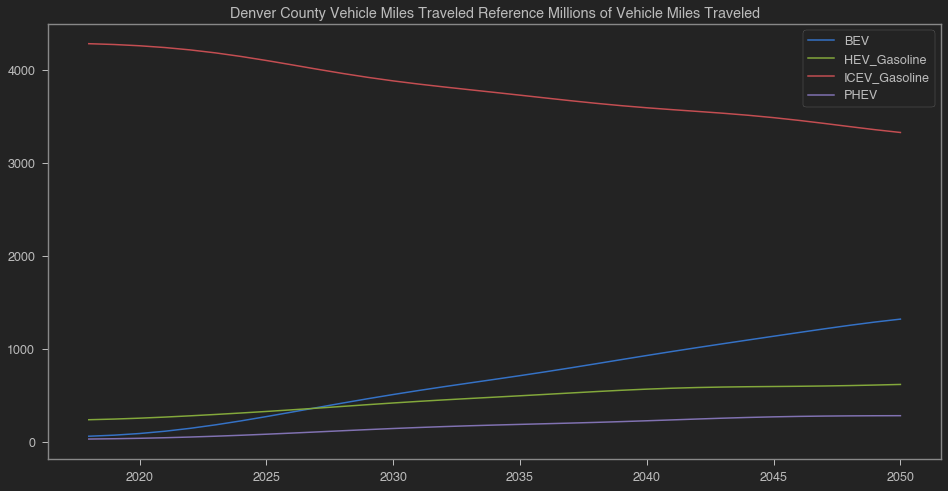

In [79]:
ref_or_high_electrification = 'Vehicle Miles Traveled Reference Millions of Vehicle Miles Trav'
technologies = ['BEV','HEV_Gasoline','ICEV_Gasoline','PHEV']

plt.figure(figsize=(16,8))
for tech in technologies:
    plt.plot(denver_county_miles_traveled[denver_county_miles_traveled['Technology']==tech]['Year'],denver_county_miles_traveled[denver_county_miles_traveled['Technology']==tech][ref_or_high_electrification])
    plt.legend(technologies)
    plt.title('Denver County '+ref_or_high_electrification+'eled')
plt.show()

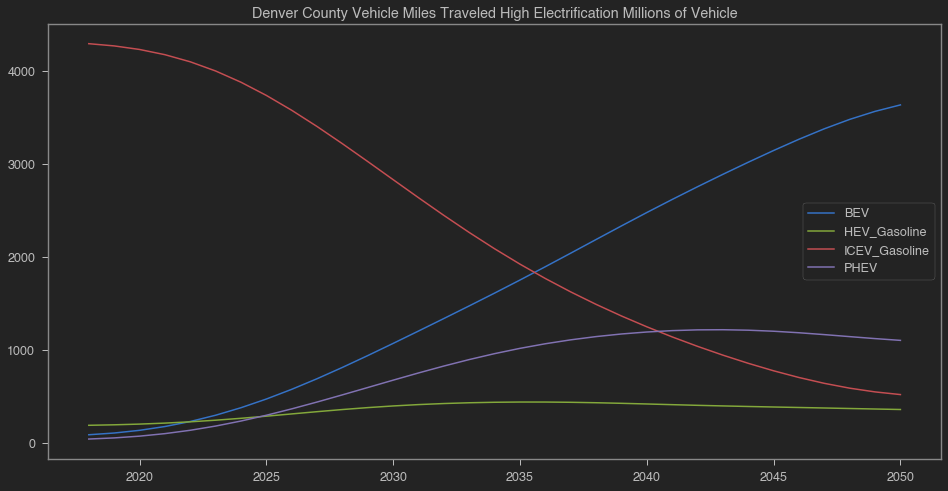

In [78]:
ref_or_high_electrification = 'Vehicle Miles Traveled High Electrification Millions of Vehicle'
technologies = ['BEV','HEV_Gasoline','ICEV_Gasoline','PHEV']

plt.figure(figsize=(16,8))
for tech in technologies:
    plt.plot(denver_county_miles_traveled[denver_county_miles_traveled['Technology']==tech]['Year'],denver_county_miles_traveled[denver_county_miles_traveled['Technology']==tech][ref_or_high_electrification])
    plt.legend(technologies)
    plt.title('Denver County '+ref_or_high_electrification)
plt.show()

## Traffic Counts and Environemental Justice Areas

In [123]:
traffic_counts_2020 = gpd.read_file('data/traffic_counts_2020/traffic_counts_2020.shp')
env_justice_areas_2014 = gpd.read_file('data/environmental_justice_areas/environmental_justice_2014.shp')
denver_roads = gpd.read_file('data/street_routes/street_routes.shp')
co_highways = gpd.read_file('data/Highways in Colorado/geo_export_f8be06ca-2647-405b-9813-08a0309bf2fd.shp')
co_local_roads = gpd.read_file('data/local/geo_export_3c280cd8-111d-4e94-9800-8520199c8292.shp')
co_counties = gpd.read_file('data/Counties in Colorado/geo_export_9b1c3b21-e319-43e6-95dd-09679206bd17.shp')

espg = 6428

denver_roads = denver_roads.to_crs(epsg=espg)
co_local_roads = co_local_roads.to_crs(epsg=espg)
co_highways = co_highways.to_crs(epsg=espg)
co_counties = co_counties.to_crs(epsg=espg)

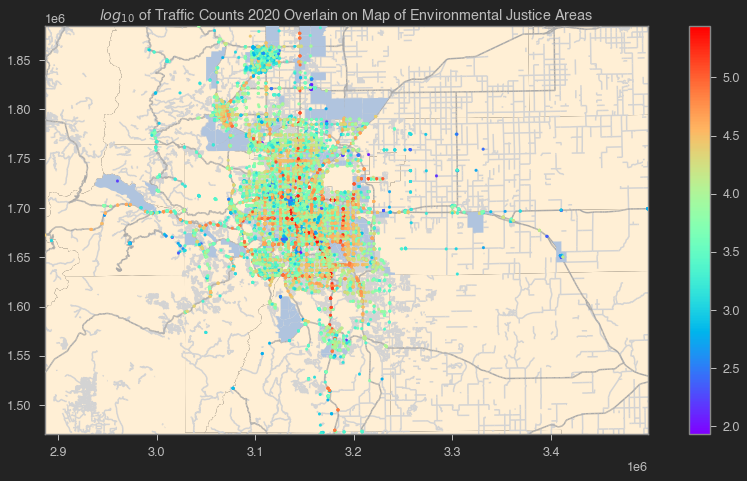

In [145]:
fig, ax = plt.subplots(figsize = (15,7.5))
ax.set_xlim([traffic_counts_2020.total_bounds[0],traffic_counts_2020.total_bounds[2]])
ax.set_ylim([traffic_counts_2020.total_bounds[1],traffic_counts_2020.total_bounds[3]])
ax.set_title('$log_{10}$ of Traffic Counts 2020 Overlain on Map of Environmental Justice Areas')

co_counties.plot(ax=ax,color='papayawhip',zorder=1)
co_local_roads.plot(ax=ax,color='lightgrey',zorder=2)
# denver_roads.plot(ax=ax,color='grey',zorder=3)
co_highways.plot(ax=ax,color='darkgrey',zorder=4)

env_justice_areas_2014.plot(ax=ax,color='lightsteelblue',zorder=5)
traffic_counts_2020['log_avg_vol'] = np.log10(traffic_counts_2020['avg_vol'])
tc = traffic_counts_2020.plot(column='log_avg_vol',ax=ax,cmap='rainbow',legend=True,markersize=8,zorder=6)

plt.show()